# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set blank dataframes to be appended during loops
weather_master = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Loop thru the cities and print log
for city in cities:
    weather_master.append(requests.get(query_url + city).json())
    print(f'Now retrieving weather information for -- {city}')

Now retrieving weather information for -- punta arenas
Now retrieving weather information for -- thompson
Now retrieving weather information for -- avarua
Now retrieving weather information for -- bama
Now retrieving weather information for -- cururupu
Now retrieving weather information for -- umm lajj
Now retrieving weather information for -- vestmannaeyjar
Now retrieving weather information for -- atuona
Now retrieving weather information for -- sorland
Now retrieving weather information for -- flinders
Now retrieving weather information for -- sawtell
Now retrieving weather information for -- merauke
Now retrieving weather information for -- coahuayana
Now retrieving weather information for -- taolanaro
Now retrieving weather information for -- ilulissat
Now retrieving weather information for -- castro
Now retrieving weather information for -- tuktoyaktuk
Now retrieving weather information for -- ituni
Now retrieving weather information for -- nizhneyansk
Now retrieving weather info

Now retrieving weather information for -- leningradskiy
Now retrieving weather information for -- rajpipla
Now retrieving weather information for -- longhua
Now retrieving weather information for -- barentsburg
Now retrieving weather information for -- saint george
Now retrieving weather information for -- port augusta
Now retrieving weather information for -- jerome
Now retrieving weather information for -- mayo
Now retrieving weather information for -- ust-charyshskaya pristan
Now retrieving weather information for -- bafq
Now retrieving weather information for -- port lincoln
Now retrieving weather information for -- shumyachi
Now retrieving weather information for -- henties bay
Now retrieving weather information for -- la ronge
Now retrieving weather information for -- grindavik
Now retrieving weather information for -- el guayabito
Now retrieving weather information for -- novo aripuana
Now retrieving weather information for -- anloga
Now retrieving weather information for -- lud

Now retrieving weather information for -- griffith
Now retrieving weather information for -- warqla
Now retrieving weather information for -- iqaluit
Now retrieving weather information for -- tawkar
Now retrieving weather information for -- pemba
Now retrieving weather information for -- soke
Now retrieving weather information for -- hailey
Now retrieving weather information for -- lebu
Now retrieving weather information for -- porto novo
Now retrieving weather information for -- ndjole
Now retrieving weather information for -- kaitangata
Now retrieving weather information for -- christchurch
Now retrieving weather information for -- bur gabo
Now retrieving weather information for -- brae
Now retrieving weather information for -- saint-augustin
Now retrieving weather information for -- bacuit
Now retrieving weather information for -- senanga
Now retrieving weather information for -- ferkessedougou
Now retrieving weather information for -- chipinge
Now retrieving weather information for

Now retrieving weather information for -- palabuhanratu
Now retrieving weather information for -- wanning
Now retrieving weather information for -- kaeo
Now retrieving weather information for -- ilembula
Now retrieving weather information for -- buariki
Now retrieving weather information for -- kurilsk
Now retrieving weather information for -- amapa
Now retrieving weather information for -- abu dhabi
Now retrieving weather information for -- muravlenko
Now retrieving weather information for -- cristalina
Now retrieving weather information for -- bandar-e anzali
Now retrieving weather information for -- lucapa
Now retrieving weather information for -- thanh hoa
Now retrieving weather information for -- khani
Now retrieving weather information for -- general roca
Now retrieving weather information for -- jadu
Now retrieving weather information for -- karaul
Now retrieving weather information for -- seoul
Now retrieving weather information for -- merritt island
Now retrieving weather info

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Define DataFrame weather_df to be composed of individual lists
city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

#Populate the lists - use exceptions to populate rows with blanks if Key Error reported
for i in range (len(cities)):
    try:
        city.append(weather_master[i]['name'])
        cloudiness.append(weather_master[i]['clouds']['all'])
        country.append(weather_master[i]['sys']['country'])
        date.append(weather_master[i]['dt'])
        humidity.append(weather_master[i]['main']['humidity'])
        lat.append(weather_master[i]['coord']['lat'])
        lng.append(weather_master[i]['coord']['lon'])
        max_temp.append(weather_master[i]['main']['temp_max'])
        wind_speed.append(weather_master[i]['wind']['speed'])
    
    except (KeyError, IndexError):
        city.append("")
        cloudiness.append("")
        country.append("")
        date.append("")
        humidity.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        wind_speed.append("")

#Build a weather dictionary -> turn it into a DataFrame
weather_dict = {"City":cities, "Cloudiness":cloudiness, "Country":country, "Date":date, 
                "Humidity":humidity,"Lat":lat,"Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed}
weather_temp_df = pd.DataFrame(weather_dict)

#Delete blank rows in the DataFrame
weather_df = weather_temp_df[weather_temp_df.Country != '']

#Write to CSV file
weather_df.to_csv('weather_cities.csv',encoding='utf-8')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75,CL,1567281091,74,-53.16,-70.91,6,14.4
1,thompson,90,CA,1567281091,82,55.74,-97.86,14,4.1
2,avarua,78,CK,1567280956,60,-21.21,-159.78,21,1.5
3,bama,70,CN,1567281092,90,24.14,107.25,20.55,2.43
4,cururupu,100,BR,1567281092,77,-1.82,-44.87,26.05,1.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

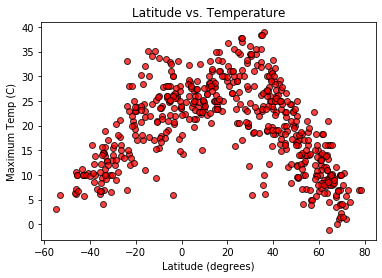

In [6]:
# Create Matplotlib scatter based on weather_df['Max Temp'], weather_df['Lat']
plt.title("Latitude vs. Temperature")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Maximum Temp (C)')
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.savefig('max_temp.png')

#### Latitude vs. Humidity Plot

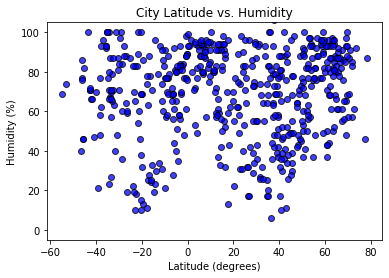

In [7]:
# Create Matplotlib scatter based on weather_df['Max Temp'], weather_df['Lat']
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
# Set Ylim in case > 100% humidity is erroneously reported
plt.ylim(-5,105)
plt.scatter(weather_df['Lat'],weather_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.savefig('humidity.png')

#### Latitude vs. Cloudiness Plot

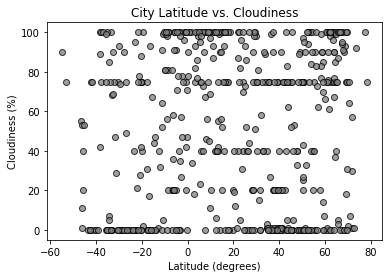

In [8]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
# Set Ylim in case > 100% cloudiness is erroneously reported
plt.ylim(-5,105)
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker="o", facecolors="gray", edgecolors="black",alpha=0.75)
plt.savefig('cloudiness.png')

#### Latitude vs. Wind Speed Plot

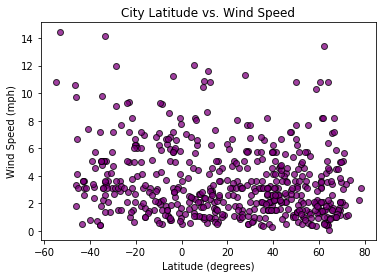

In [9]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker="o", facecolors="purple", edgecolors="black",alpha=0.75)
plt.savefig('wind_speed.png')

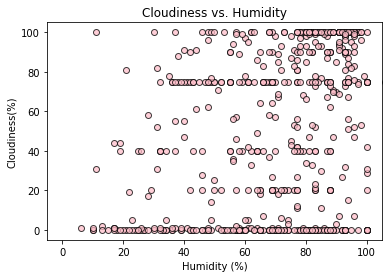

In [11]:
#Cloudiness vs. Humidity 
plt.title('Cloudiness vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Cloudiness(%)')
#Set X, Y plot limits to weed out erroneous % reports
plt.ylim(-5,105)     
plt.xlim(-5,105)
plt.scatter(weather_df['Humidity'],weather_df['Cloudiness'], marker="o", facecolors="pink", edgecolors="black",alpha=0.75)
plt.savefig('cloudiness_humidity.png')

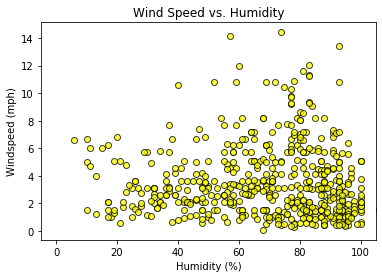

In [12]:
#Wind Speed vs. humidity 
plt.title('Wind Speed vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Windspeed (mph)')
#Set X plot limit to weed out erroneous % reports    
plt.xlim(-5,105)
plt.scatter(weather_df['Humidity'],weather_df['Wind Speed'], marker="o", facecolors="yellow", edgecolors="black",alpha=0.75)
plt.savefig('windspeed_humidity.png')